In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/fake_and_real_news.csv.zip'
df = pd.read_csv('/content/drive/MyDrive/fake_and_real_news.csv.zip')

# Convert text data to numerical using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X = vectorizer.fit_transform(df.iloc[:, 0])  # Assuming first column contains text
y = df.iloc[:, -1].map({'Fake': 0, 'Real': 1}).values  # Convert target labels to numeric

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Confusion Matrix (Training Data):
 [[3578  449]
 [  82 3811]]
Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      4027
           1       0.89      0.98      0.93      3893

    accuracy                           0.93      7920
   macro avg       0.94      0.93      0.93      7920
weighted avg       0.94      0.93      0.93      7920



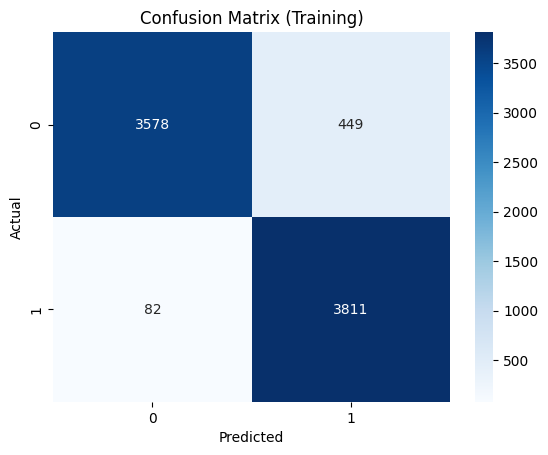

Confusion Matrix (Testing Data):
 [[763 210]
 [ 59 948]]
Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       973
           1       0.82      0.94      0.88      1007

    accuracy                           0.86      1980
   macro avg       0.87      0.86      0.86      1980
weighted avg       0.87      0.86      0.86      1980



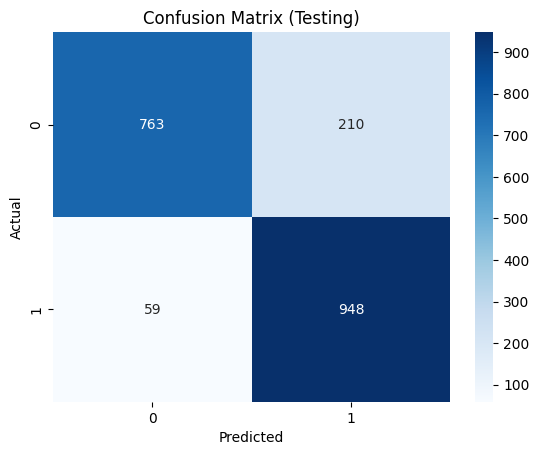

In [7]:
# A1: Evaluate Confusion Matrix & Performance Metrics
def evaluate_model(y_true, y_pred, data_type):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix ({data_type} Data):\n", cm)
    print(f"Classification Report ({data_type} Data):\n", classification_report(y_true, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({data_type})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train k-NN model and evaluate performance
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Testing")

In [9]:
# A2: Calculate Regression Metrics using Probability Scores
def evaluate_regression(y_true, y_pred_prob):
    mse = mean_squared_error(y_true, y_pred_prob)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred_prob)
    r2 = r2_score(y_true, y_pred_prob)

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, R² Score: {r2:.4f}")

# Get probability predictions instead of class labels
y_train_prob = knn.predict_proba(X_train)[:, 1]  # Probability of being Real News
y_test_prob = knn.predict_proba(X_test)[:, 1]    # Probability of being Real News

# Evaluate regression metrics on classification probabilities
print("Regression Metrics (Training Data):")
evaluate_regression(y_train, y_train_prob)

print("\nRegression Metrics (Testing Data):")
evaluate_regression(y_test, y_test_prob)

Regression Metrics (Training Data):
MSE: 0.0466, RMSE: 0.2159, MAPE: 324122700454694.8125, R² Score: 0.8134

Regression Metrics (Testing Data):
MSE: 0.1033, RMSE: 0.3214, MAPE: 504949049129419.2500, R² Score: 0.5866


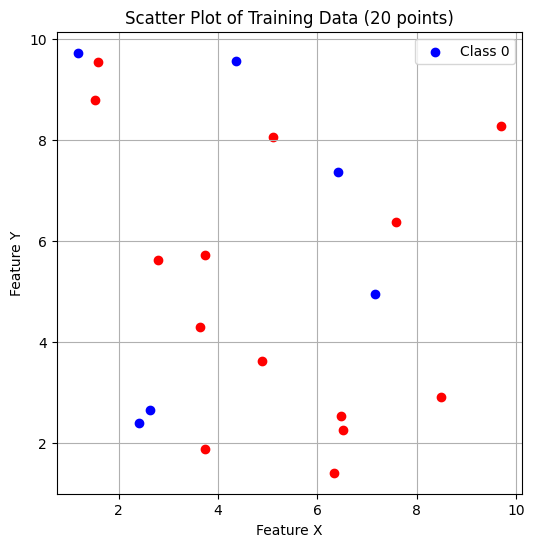

KNeighborsClassifier(n_neighbors=3)

In [10]:
# A3: Generate Training Data (20 points with 2 features)
np.random.seed(42)  # Ensure reproducibility
n_train = 20
X_train_sample = np.random.uniform(1, 10, (n_train, 2))  # Random 2D points in range [1,10]
y_train_sample = np.random.choice([0, 1], n_train)  # Random class labels (0 or 1)

# Scatter Plot of Training Data
plt.figure(figsize=(6, 6))
for i in range(n_train):
    if y_train_sample[i] == 0:
        plt.scatter(X_train_sample[i, 0], X_train_sample[i, 1], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X_train_sample[i, 0], X_train_sample[i, 1], color='red', label='Class 1' if i == 0 else "")

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data (20 points)")
plt.legend()
plt.grid(True)
plt.show()

# Train a separate kNN model for 2D data
knn_2D = KNeighborsClassifier(n_neighbors=3)
knn_2D.fit(X_train_sample, y_train_sample)

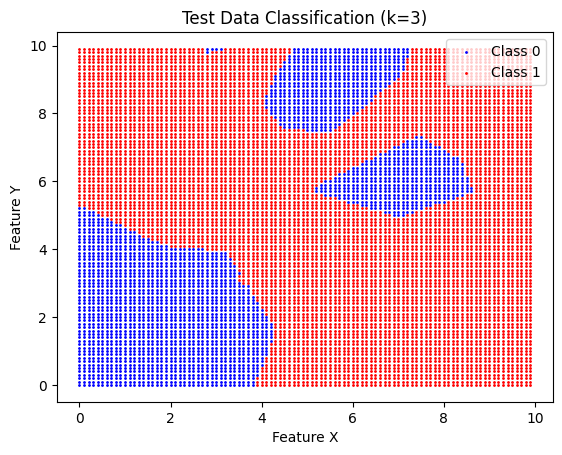

In [11]:
# A4: Generate Test Data (10,000 points) & Classify using kNN (k=3)
X_test_sample = np.array([[x, y] for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])
y_pred_sample = knn_2D.predict(X_test_sample)

# Scatter Plot of Test Data
plt.scatter(X_test_sample[y_pred_sample == 0, 0], X_test_sample[y_pred_sample == 0, 1], color='blue', s=1, label='Class 0')
plt.scatter(X_test_sample[y_pred_sample == 1, 0], X_test_sample[y_pred_sample == 1, 1], color='red', s=1, label='Class 1')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Test Data Classification (k=3)")
plt.legend()
plt.show()

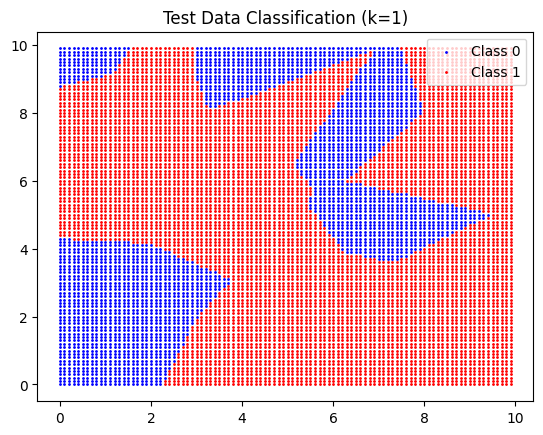

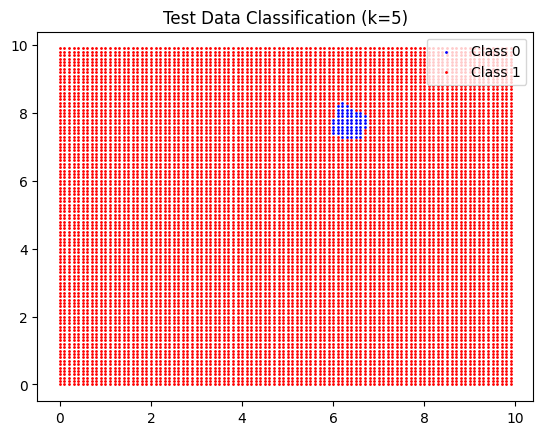

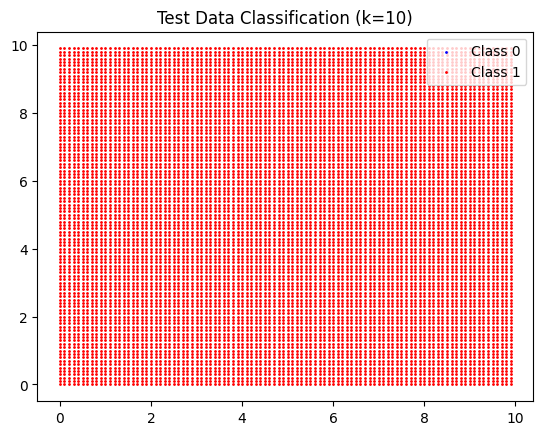

In [12]:
# A5: Experiment with Different k Values
k_values = [1, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sample, y_train_sample)
    y_pred_sample = knn.predict(X_test_sample)
    plt.scatter(X_test_sample[y_pred_sample == 0, 0], X_test_sample[y_pred_sample == 0, 1], color='blue', s=1, label='Class 0')
    plt.scatter(X_test_sample[y_pred_sample == 1, 0], X_test_sample[y_pred_sample == 1, 1], color='red', s=1, label='Class 1')
    plt.title(f"Test Data Classification (k={k})")
    plt.legend()
    plt.show()

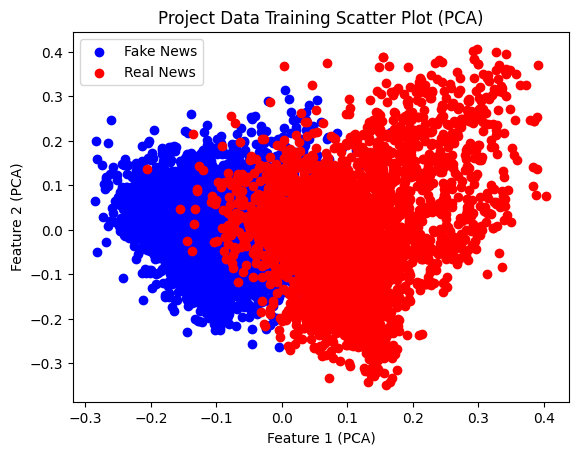

In [13]:
# A6: Repeat A3 to A5 for Project Data (Fake & Real News)
# Reduce TF-IDF to 2D using PCA
pca = PCA(n_components=2)
X_project = pca.fit_transform(X.toarray())  # Convert sparse matrix to array & reduce dimensions

# Split Project Data
X_train_proj, X_test_proj, y_train_proj, y_test_proj = train_test_split(X_project, y, test_size=0.2, random_state=42)

# Train kNN on Project Data
knn_proj = KNeighborsClassifier(n_neighbors=3)
knn_proj.fit(X_train_proj, y_train_proj)
y_test_proj_pred = knn_proj.predict(X_test_proj)

# Scatter Plot for Project Training Data
plt.scatter(X_train_proj[y_train_proj == 0, 0], X_train_proj[y_train_proj == 0, 1], color='blue', label='Fake News')
plt.scatter(X_train_proj[y_train_proj == 1, 0], X_train_proj[y_train_proj == 1, 1], color='red', label='Real News')
plt.xlabel("Feature 1 (PCA)")
plt.ylabel("Feature 2 (PCA)")
plt.title("Project Data Training Scatter Plot (PCA)")
plt.legend()
plt.show()


Best k value found using GridSearchCV: 19


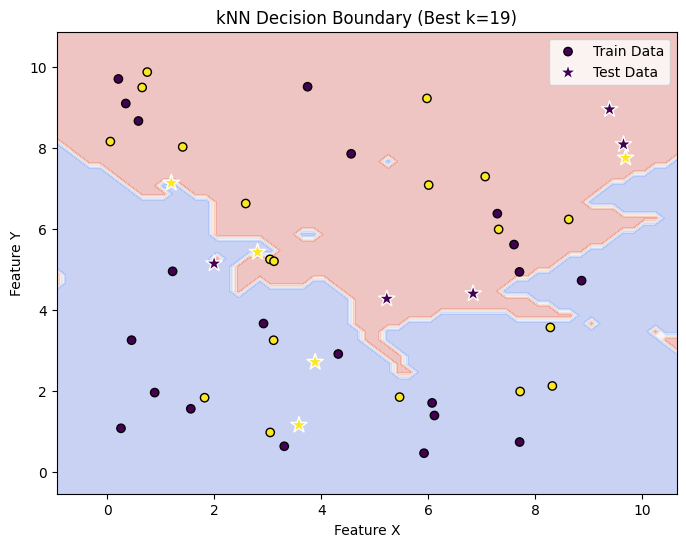

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Sample dataset
np.random.seed(42)
X, y = np.random.rand(50, 2) * 10, np.random.choice([0, 1], 50)  # 50 points, 2D features

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Fix: Ensure k does not exceed the number of training samples
max_k = min(len(X_train), 20)  # k should be ≤ number of training samples
param_grid = {'n_neighbors': np.arange(1, max_k)}

# GridSearchCV to find the best k
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Get best k value
best_k = grid.best_params_['n_neighbors']
print(f"Best k value found using GridSearchCV: {best_k}")

# Train kNN classifier using best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on test data
y_pred = knn_best.predict(X_test)

# ✅ Plot Decision Boundary
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in mesh
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="w", marker="*", s=150, label="Test Data")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title(f"kNN Decision Boundary (Best k={best_k})")
plt.legend()
plt.show()
